Houze Xu

1005133115

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# import imblearn
# from imblearn.over_sampling import RandomOverSampler  
import warnings 

1.1 Import the monthly and annual data and join

Annual features approach

In [3]:
annual_features = pd.read_excel("annual_features.xlsx")
annual_day_of_week_counts_pivot = pd.read_excel("annual_day_of_week_counts_pivot.xlsx")
Retail_Data_Response = pd.read_csv("Retail_Data_Response.csv")
print("The dimension of annual_features output is:", annual_features.shape)
print("The dimension of annual_day_of_week_counts_pivot is:", annual_day_of_week_counts_pivot.shape)
print("The dimension of Retail_Data_Response is:", Retail_Data_Response.shape)

The dimension of annual_features output is: (6889, 41)
The dimension of annual_day_of_week_counts_pivot is: (6889, 36)
The dimension of Retail_Data_Response is: (6884, 2)


In [4]:
annual_features.head()

,customer_id,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,...,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,ann_txn_min_2011,ann_txn_min_2012,ann_txn_min_2013,ann_txn_min_2014,ann_txn_min_2015
0,CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,...,485.333333,161.800000,1190.333333,284.333333,0.000000,56,52,36,59,39
1,CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,...,444.333333,290.200000,171.200000,781.666667,745.333333,57,51,65,36,44
2,CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,...,94.700000,968.000000,619.300000,726.166667,0.000000,76,53,43,37,79
3,CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,...,225.000000,477.285714,110.952381,512.250000,0.000000,72,41,66,50,55
4,CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,...,449.583333,908.333333,0.000000,636.800000,0.000000,41,45,59,40,0


In [5]:
annual_day_of_week_counts_pivot.head()

,customer_id,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
0,CS1112,1,0,0,1,0,0,1,0,0,...,1,1,1,0,0,0,0,0,0,1
1,CS1113,1,1,0,1,0,0,0,2,1,...,0,3,0,0,2,0,0,0,0,1
2,CS1114,0,1,0,1,1,0,2,0,0,...,0,1,1,0,0,0,0,1,0,0
3,CS1115,0,0,1,1,0,0,1,1,1,...,2,0,2,0,0,0,0,1,0,0
4,CS1116,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Retail_Data_Response.head()

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


In [7]:
annual_features_outputs = pd.merge(annual_features, annual_day_of_week_counts_pivot, on = 'customer_id')

In [8]:
annual_features_outputs = pd.merge(annual_features_outputs, Retail_Data_Response, on = 'customer_id')

In [9]:
annual_features_outputs.head()

,customer_id,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,...,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday,response
0,CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,...,1,1,0,0,0,0,0,0,1,0
1,CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,...,3,0,0,2,0,0,0,0,1,0
2,CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,...,1,1,0,0,0,0,1,0,0,1
3,CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,...,0,2,0,0,0,0,1,0,0,1
4,CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,...,0,0,0,0,0,0,0,0,0,1


Monthly features approach

In [10]:
mth_rolling_features = pd.read_excel("mth_rolling_features.xlsx")
mth_day_counts = pd.read_excel("mth_day_counts.xlsx")
days_since_last_txn = pd.read_excel("days_since_last_txn.xlsx")
print("The dimension of mth_rolling_features is:", mth_rolling_features.shape)
print("The dimension of mth_day_counts is:", mth_day_counts.shape)
print("The dimension of days_since_last_txs is:", days_since_last_txn.shape)

The dimension of mth_rolling_features is: (323783, 23)
The dimension of mth_day_counts is: (323783, 10)
The dimension of days_since_last_txs is: (323783, 4)


In [11]:
mth_rolling_features.head()

,Unnamed: 0,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
0,157064,CS1112,2011-05-31,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157058,CS1112,2011-06-30,56,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157044,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157069,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157060,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# drop the first row 
mth_rolling_features.drop('Unnamed: 0', axis = 1, inplace = True)
mth_day_counts.drop('Unnamed: 0', axis = 1, inplace = True)
days_since_last_txn.drop('Unnamed: 0', axis = 1, inplace = True)

In [13]:
# merge dataframe monthly
mth_rolling_features.rename(columns = {'CLNT_NO': 'customer_id'}, inplace = True)
mth_day_counts.rename(columns = {'CLNT_NO': 'customer_id'}, inplace = True)
days_since_last_txn.rename(columns = {'CLNT_NO': 'customer_id'}, inplace = True)
df_monthly = pd.merge(mth_rolling_features, mth_day_counts,on=['customer_id','ME_DT'])\
               .merge(days_since_last_txn,on=['customer_id','ME_DT'])\
               .merge(Retail_Data_Response,on='customer_id')
monthly_features_outputs = pd.merge(mth_rolling_features, mth_day_counts, on=['customer_id', 'ME_DT'])\
                             .merge(days_since_last_txn, on = ['customer_id','ME_DT'])\
                             .merge(Retail_Data_Response, on = 'customer_id')

In [14]:
# fill nan with 0 since logistic regression cannot fit data with nans
monthly_features_outputs = monthly_features_outputs.fillna(0)

In [15]:
sum(monthly_features_outputs.isnull().sum())==0

True

In [16]:
# shape of monthly_features_outputs after drop nans 
monthly_features_outputs.shape

(323548, 31)

1.2 Steps for each method

1. Separate the inputs X and the output y in two data frames.

In [17]:
annual_features_outputs

,customer_id,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,...,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday,response
0,CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,...,1,1,0,0,0,0,0,0,1,0
1,CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,...,3,0,0,2,0,0,0,0,1,0
2,CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,...,1,1,0,0,0,0,1,0,0,1
3,CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,...,0,2,0,0,0,0,1,0,0,1
4,CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,2,3,2,6,...,1,2,0,0,0,0,0,0,0,0
6880,CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,2,4,6,2,...,0,0,0,0,0,0,0,0,0,0
6881,CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,2,5,2,4,...,1,1,0,0,0,0,0,0,0,0
6882,CS8999,52.000000,25.250000,28.000000,21.000000,0.000000,3,4,3,2,...,0,2,0,0,0,0,0,0,0,0


In [18]:
# Separate the inputs X and output y in annual features approach
X_annual_input = annual_features_outputs.drop(['customer_id','response'], axis = 1)
y_annual_output = annual_features_outputs['response']

In [19]:
# Separate the inputs X and output y in monthly features approach
X_month_input = monthly_features_outputs.drop(['customer_id','response', 'ME_DT'], axis = 1)
y_month_output = monthly_features_outputs['response']

1.2.2 Split the data in train and test set. Use a test size value of 2/3 and set the random state
equal to 1147 for consistency (i.e. the course code value). Use the following names for
consistency.

In [20]:
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X_annual_input, y_annual_output, test_size = 2/3, random_state = 1147)
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_month_input, y_month_output, test_size = 2/3, random_state = 1147)

In [21]:
# shape of annual input
X_train_annual.shape

(2294, 75)

In [22]:
# shape of monthly input
X_train_monthly.shape

(107849, 28)

In [23]:
# The ratio distribution of annualy training target
print('The positive ratio in annualy training target is:', y_train_annual.value_counts(1)[0])
print('The negative ratio in annualy training target is:', y_train_annual.value_counts(1)[1])

The positive ratio in annualy training target is: 0.9145597210113339
The negative ratio in annualy training target is: 0.08544027898866609


<AxesSubplot:xlabel='response', ylabel='count'>

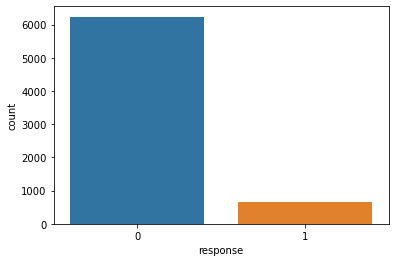

In [24]:
# Plotting the ratio distribution of annualy training taget
sns.countplot(x = 'response', data = annual_features_outputs)

From plotting the distribution of negative and positive responses, we see the the annual feature response data is unbalanced.We will set class_weight = 'balanced' in each model to fix the unbalanced data.

In [25]:
# The raio distribution of monthly training target
print('The positive ratio in monthly training target is:', y_train_monthly.value_counts(1)[0])
print('The negative ratio in monthly training target is:', y_train_monthly.value_counts(1)[1])

The positive ratio in monthly training target is: 0.9062856401079287
The negative ratio in monthly training target is: 0.09371435989207132


<AxesSubplot:xlabel='response', ylabel='count'>

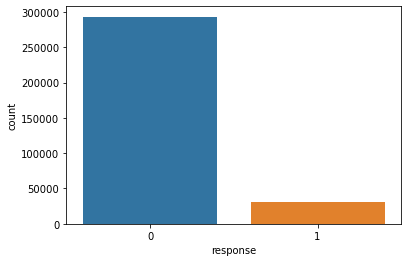

In [26]:
# plot monthly features outputs
sns.countplot(x = 'response', data = monthly_features_outputs)

From plotting the distribution of negative and positive responses, we see the the monthly feature response data is unbalanced. We will set class_weight = 'balanced' in each model to fix the unbalanced data.

1.2.3 Pre-process 

In [27]:
scaler = StandardScaler()
X_train_annual_scaled = scaler.fit_transform(X_train_annual)
X_test_annual_scaled = scaler.transform(X_test_annual)

In [28]:
X_train_monthly_scaled = scaler.fit_transform(X_train_monthly)
X_test_monthly_scaled = scaler.transform(X_test_monthly)

1.2.4 Fit the training dataset and optimize the hyperparameters of the method

## Logistic Regression with L1 regularization (Annually)

In [29]:
# grid_search approach
# set class_weight equals to 'balanced' to fix the unbalanced data problem
model_lr = LogisticRegression(penalty = 'l1', solver = 'liblinear', class_weight = 'balanced', random_state = 1147)
params = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
grid = GridSearchCV(model_lr,  param_grid = params, scoring = 'f1')
grid.fit(X_train_annual_scaled, y_train_annual)
print('The best f1 score is:', grid.best_score_)
print('The best hyperparameters is:', grid.best_params_)

/Users/houze/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/houze/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/houze/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/houze/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The best f1 score is: 0.2831062853497965
The best hyperparameters is: {'C': 0.1}


/Users/houze/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [30]:
model_lr = LogisticRegression(C = grid.best_params_['C'], penalty = 'l1', solver = 'liblinear', class_weight = 'balanced', random_state = 1147)
model_lr.fit(X_train_annual_scaled, y_train_annual)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   random_state=1147, solver='liblinear')

Since GridSearch is limited for the underlying reasoning for choosing the hyperparameter for different scoring techniques, we write a function to test scores for each hyperparameter. 

In [31]:
def logistic_regression_model(X_train, y_train, X_test, y_test):
    C  = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
    estimator_C = []
    acc_test = []
    auc_train = []
    auc_test = []
    f1_train = []
    f1_test = []
    for i in range(len(C)):
        # we set class_weight to 'balanced' to fix unbalanced data
        estimator_C.append(LogisticRegression(C = C[i], penalty = 'l1', solver = 'liblinear', class_weight = 'balanced', random_state = 1147))
        estimator_C[i].fit(X_train, y_train)
        # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
        scores_train = estimator_C[i].predict_proba(X_train)[:,1] 
        scores_test  = estimator_C[i].predict_proba(X_test)[:,1]  
        # Predict the class of test set
        y_train_predicted = estimator_C[i].predict(X_train)
        y_test_predicted = estimator_C[i].predict(X_test)
        # Calculate accuracy at every iteration and append
        
        acc_test.append(100*accuracy_score(y_test, y_test_predicted, normalize = True))

        # Calculate f1 scores at every iteration and append
        f1_train.append(100*f1_score(y_train, y_train_predicted))
        f1_test.append(100*f1_score(y_test, y_test_predicted))
        
        # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
        fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
        # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
        fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
        # Calculate the AUCs
        auc_train.append(auc(fpr_train, tpr_train))
        auc_test.append(auc(fpr_test, tpr_test))
    table_acc = pd.DataFrame(columns=['C','acc_test','f1_train','f1_test','auc_train','auc_test'])
    table_acc['C'] = C
    table_acc['acc_test'] = acc_test
    table_acc['f1_train'] = f1_train
    table_acc['f1_test'] = f1_test
    table_acc['auc_train'] = auc_train
    table_acc['auc_test'] = auc_test
    fig_1 = plt.figure(figsize=(16,8))

    fig_1_a = plt.subplot(131)
    ax1 = table_acc.plot(x = 'C', y = 'acc_test', ax = fig_1_a, style = 'o-', markersize =15)
    ax1.set_ylabel("Normalized Accuracy (%)")
    ax1.set_xlabel("C")

    fig_1_b = plt.subplot(132)
    ax2 = table_acc.plot(x = 'C', y = 'f1_train', ax = fig_1_b, style = 'o-', markersize =15)
    ax2 = table_acc.plot(x = 'C', y = 'f1_test', ax = fig_1_b, style = 'o-', markersize =15)
    ax2.set_xlabel("C")
    ax2.set_ylabel("F1 Score")
    # ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    fig_1_c = plt.subplot(133)
    ax2 = table_acc.plot(x = 'C', y = 'auc_train', ax = fig_1_c, style = 'o-', markersize =15)
    ax2 = table_acc.plot(x = 'C', y = 'auc_test', ax = fig_1_c, style = 'o-', markersize =15)
    ax2.set_xlabel("C")
    ax2.set_ylabel("Area Under the Curve (AUC)")
    # ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.show()
    return table_acc

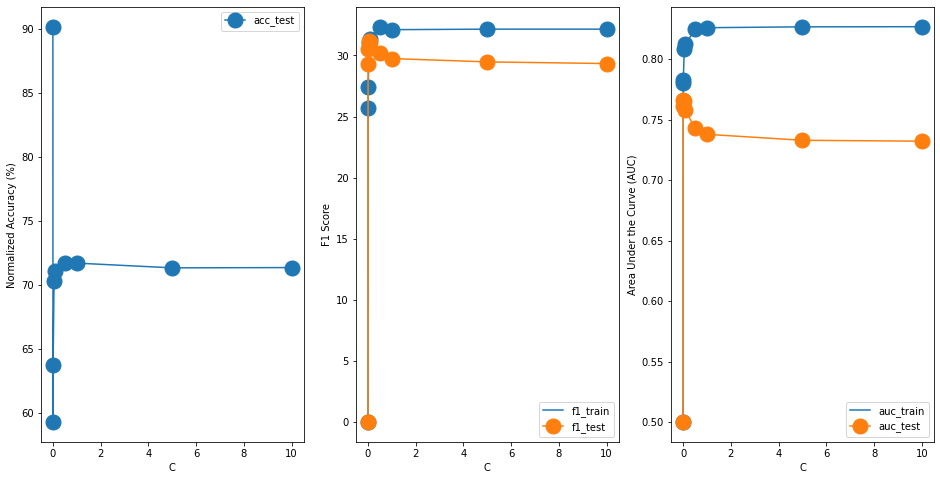

In [32]:
table_acc_lr= logistic_regression_model(X_train_annual_scaled, y_train_annual, X_test_annual_scaled, y_test_annual)

In [33]:
table_acc_lr

,C,acc_test,f1_train,f1_test,auc_train,auc_test
0,0.001,90.174292,0.000000,0.000000,0.500000,0.500000
1,0.005,59.281046,25.696594,29.284904,0.780105,0.761305
2,0.010,63.769063,27.457627,30.563674,0.783156,0.765953
3,0.050,70.305011,31.045407,31.196365,0.808272,0.765026
4,0.100,71.089325,31.376734,31.136482,0.812453,0.757643
5,0.500,71.677560,32.356135,30.182599,0.824687,0.742994
6,1.000,71.699346,32.112069,29.745809,0.826030,0.737887
7,5.000,71.328976,32.154341,29.474812,0.826735,0.732947
8,10.000,71.350763,32.154341,29.339065,0.826866,0.732204


As we could observe from the table and 3 plots, we found the f1 score and auc score for testing set start decrease at the corner of C = 0.05. The accuracy score for testing set start decrease and increase and decrease at the end. In order to reduce the model complexity to avoid overfitting and acheive the best score for these 3 scoring techniques, we choose C=0.05 to be our best hyperparameter in our chosen range.

In [34]:
def best_model_lr(C, X_train, X_train_scaled, y_train, X_test, y_test):
    # set class_weight equals to 'balanced' to fix the unbalanced data problem
    model_lr = LogisticRegression(C = C, penalty = 'l1', solver = 'liblinear', class_weight = 'balanced', random_state = 1147)
    model_lr.fit(X_train_scaled, y_train)
    importances_lr = model_lr.coef_
    # plot coefficient values for logistic regression
    plt.figure(figsize=(12,9)) 
    # sort importances in descending order
    indices = np.argsort(abs(importances_lr[0]))[::-1]
    feature_names = [X_train.columns[i] for i in indices]
    plt.title("Coefficient values")
    plt.bar(range(X_train.shape[1]), importances_lr[0][indices])
    plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
    plt.show() 
    
    # plot probability 
    y_test_pred = model_lr.predict(X_test)
    y_test_prob = model_lr.predict_proba(X_test)
    scores_train = model_lr.predict_proba(X_train_scaled)[:,1] 
    scores_test  = model_lr.predict_proba(X_test)[:,1]  
    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)
    return model_lr, importances_lr, y_test_pred, y_test_prob, fpr_train, fpr_test, tpr_train, tpr_test, auc_train, auc_test  

In [35]:
def plot_probability(y_test_pred, y_test_prob):
    sns.displot(data = y_test_prob[:,1], x = 100 * y_test_prob[:,1])
    plt.title('Distribution of Proability of Positive Responses')
    plt.xlabel('Probility of Positive Responses')
    plt.ylabel('Frequency')
    plt.show()

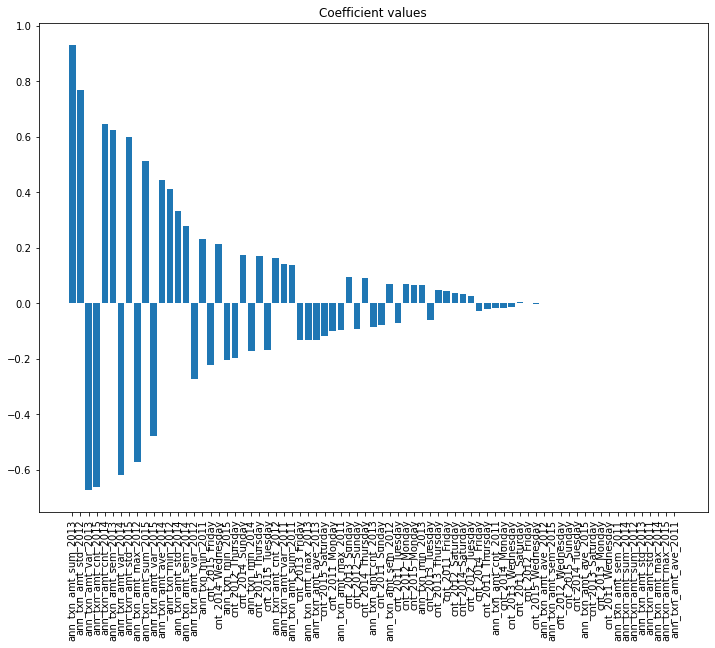

In [36]:
# Plot coefficient values or feature importance.
model_lr_annual, importances_lr_annual, y_test_pred_annual, y_test_prob_annual, fpr_train_annual, fpr_test_annual, tpr_train_annual, tpr_test_annual, auc_train_annual, auc_test_annual = best_model_lr(0.500, X_train_annual, X_train_annual_scaled, y_train_annual, X_test_annual_scaled, y_test_annual)

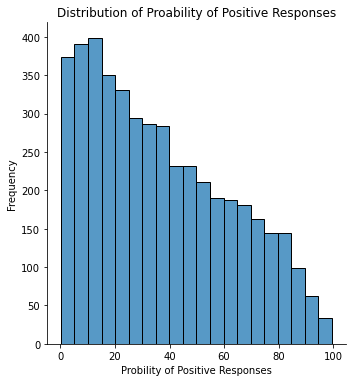

In [37]:
# Plot probability distribution for test set.
plot_probability(y_test_pred_annual, y_test_prob_annual)

In [38]:
def plot_confusion_matrix(y_test, y_test_predicted, normalize = False): 
    cm = confusion_matrix(y_test, y_test_predicted)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title('Paid or Default Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    thresh = cm.max() / 2.
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.show()
    print("Precision score is:", precision_score(y_test, y_test_predicted))
    print("Recall score is:", recall_score(y_test, y_test_predicted))

Confusion matrix, without normalization
[[3009 1130]
 [ 170  281]]


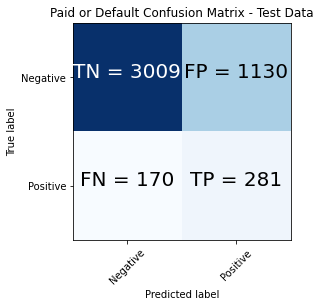

Precision score is: 0.1991495393338058
Recall score is: 0.623059866962306


In [39]:
# plot the confusion matrix and calculate precision and recall
plot_confusion_matrix(y_test_annual, y_test_pred_annual)

In [40]:
# plot ROC curves
def ROC_curves(fpr_train, tpr_train, fpr_test, tpr_test, auc_train, auc_test):
    plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train))
    plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test))
    plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5')
    plt.ylim([0,1.0])
    plt.xlim([0,1.0])
    plt.title('ROC Curves', fontsize = 18)
    plt.ylabel('True positive rate', fontsize = 18)
    plt.xlabel('False positive rate', fontsize = 18)
    plt.legend()
    plt.show()

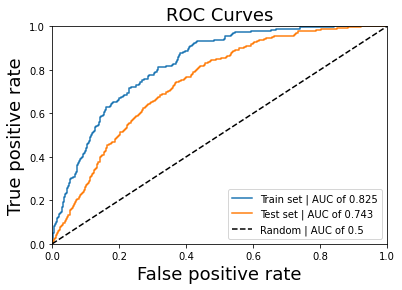

In [41]:
ROC_curves(fpr_train_annual, tpr_train_annual, fpr_test_annual, tpr_test_annual, auc_train_annual, auc_test_annual)

In [42]:
# plot decision boundary for top 2 features
def decision_boundary(best_model, coeff_importances, X_train, X_train_scaled, y_train):
    indices = np.argsort(abs(coeff_importances[0]))[::-1]
    top_feature_1_index = indices[0]
    top_feature_2_index = indices[1]
    top_feature_1 = X_train.columns[top_feature_1_index]
    top_feature_2 = X_train.columns[top_feature_2_index]
    min_value1 = X_train_scaled.min(axis=0)[top_feature_1_index] 
    min_value2 = X_train_scaled.min(axis=0)[top_feature_2_index]
    max_value1 = X_train_scaled.max(axis=0)[top_feature_1_index]  
    max_value2 = X_train_scaled.max(axis=0)[top_feature_2_index]
    min_value1_round = np.floor(min_value1)
    min_value2_round = np.floor(min_value2)
    max_value1_round = np.ceil(max_value1)
    max_value2_round = np.ceil(max_value2)
    step1 = (max_value1_round - min_value1_round)/10
    step2 = (max_value2_round - min_value2_round)/10
    xx, yy = np.mgrid[min_value1_round:max_value1_round:step1, min_value2_round:max_value2_round:step2] # The steps 1.1111 and 1.75 were selected to create a 10x10 grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    print(grid.shape) # Confirm that grid shape is 10x10

    # np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
    # np.ones is a table full of ones
    median_inputs = np.ones((100, X_train.shape[1])) * np.median(X_train_scaled, axis=0) 
    pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

    median_inputs[:,top_feature_1_index] = grid[:,0]
    median_inputs[:,top_feature_2_index] = grid[:,1]
    probs = best_model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X_train_scaled[50:,top_feature_1_index], X_train_scaled[50:, top_feature_2_index], c=y_train[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

    ax.set(aspect="auto",
       xlim=(min_value1_round, max_value1_round), ylim=(min_value2_round, max_value2_round),
       xlabel=f"{top_feature_1}", ylabel=f"{top_feature_2}")

(100, 2)


<ipython-input-42-f3520da95f53>:37: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.scatter(X_train_scaled[50:,top_feature_1_index], X_train_scaled[50:, top_feature_2_index], c=y_train[50:], s=50,


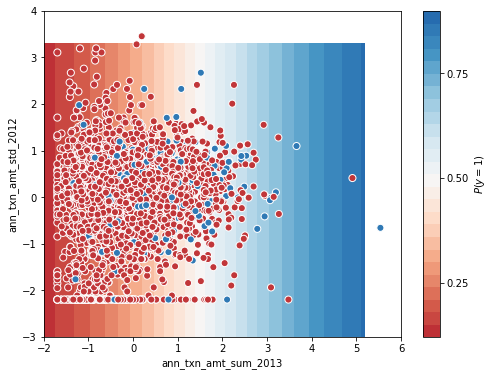

In [43]:
decision_boundary(model_lr, importances_lr_annual, X_train_annual, X_train_annual_scaled, y_train_annual)

## Decision Tree (Annually)

In [44]:
def best_model_dt(X_train_scaled, y_train, X_test_scaled, y_test):
    max_depth_range = range(1, 7)
    estimator_max_depth = []
    accuracy_normalized = []
    auc_train           = []
    auc_test            = []
    f1_train            = []
    f1_test             = []
    
    for i in max_depth_range:
        # Define and fit
        estimator_max_depth.append(DecisionTreeClassifier(random_state=1147, max_depth = i, class_weight = 'balanced'))
        estimator_max_depth[i-1].fit(X_train_scaled, y_train)
        # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
        scores_train = estimator_max_depth[i-1].predict_proba(X_train_scaled)[:,1] 
        scores_test  = estimator_max_depth[i-1].predict_proba(X_test_scaled)[:,1]  
        # Predict the class of test set
        y_train_predicted = estimator_max_depth[i-1].predict(X_train_scaled)
        y_test_predicted = estimator_max_depth[i-1].predict(X_test_scaled)
        # Calculate accuracy at every iteration and append
        accuracy_normalized.append(100*accuracy_score(y_test, y_test_predicted, normalize = True))
        # Calculate training and test F1 score at every iteration and append 
        f1_train.append(100*f1_score(y_train, y_train_predicted)) 
        f1_test.append(100*f1_score(y_test, y_test_predicted)) 
        # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
        fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
        # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
        fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
        # Calculate the AUCs
        auc_train.append(auc(fpr_train, tpr_train))
        auc_test.append(auc(fpr_test, tpr_test))
        
    table_acc_dt = pd.DataFrame(columns=['Max_Depth','accuracy_normalized','f1_train','f1_test','auc_train','auc_test'])
    table_acc_dt['Max_Depth'] = list(max_depth_range)
    table_acc_dt['accuracy_normalized'] = accuracy_normalized
    table_acc_dt['f1_train'] = f1_train
    table_acc_dt['f1_test'] = f1_test
    table_acc_dt['auc_train'] = auc_train
    table_acc_dt['auc_test'] = auc_test
    
    fig_1 = plt.figure(figsize=(16,8))

    fig_1_a = plt.subplot(131)
    ax1 = table_acc_dt.plot(x = 'Max_Depth', y = 'accuracy_normalized', ax = fig_1_a, style = 'o-', markersize =15)
    ax1.set_ylabel("Normalized Accuracy (%)")
    ax1.set_xlabel("Max_Depth")

    fig_1_b = plt.subplot(132)
    ax2 = table_acc_dt.plot(x = 'Max_Depth', y = 'f1_train', ax = fig_1_b, style = 'o-', markersize =15)
    ax2 = table_acc_dt.plot(x = 'Max_Depth', y = 'f1_test', ax = fig_1_b, style = 'o-', markersize =15)
    ax2.set_xlabel("Max_Depth")
    ax2.set_ylabel("F1 Score")
    # ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    fig_1_c = plt.subplot(133)
    ax2 = table_acc_dt.plot(x = 'Max_Depth', y = 'auc_train', ax = fig_1_c, style = 'o-', markersize =15)
    ax2 = table_acc_dt.plot(x = 'Max_Depth', y = 'auc_test', ax = fig_1_c, style = 'o-', markersize =15)
    ax2.set_xlabel("Max_Depth")
    ax2.set_ylabel("Area Under the Curve (AUC)")
    # ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.show()
    return table_acc_dt

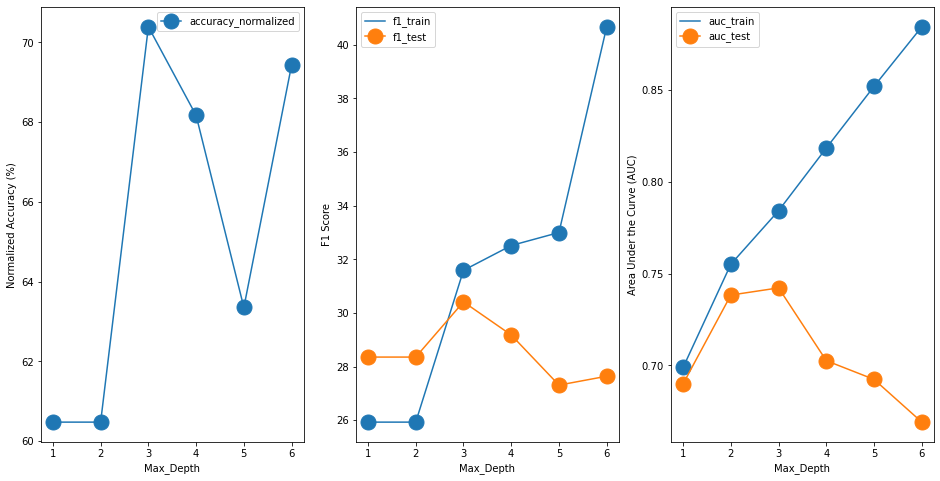

In [45]:
table_acc_dt = best_model_dt(X_train_annual_scaled, y_train_annual, X_test_annual_scaled, y_test_annual)

In [46]:
table_acc_dt

,Max_Depth,accuracy_normalized,f1_train,f1_test,auc_train,auc_test
0,1,60.479303,25.931929,28.357030,0.698916,0.689983
1,2,60.479303,25.931929,28.357030,0.755100,0.738316
2,3,70.392157,31.590181,30.414747,0.784239,0.742226
3,4,68.169935,32.515337,29.180805,0.818369,0.702593
4,5,63.355120,33.000907,27.312014,0.851948,0.692404
5,6,69.433551,40.670391,27.643115,0.884363,0.669150


From the table and 3 plots, we could observe that as the max depth of the decision tree reaches to 3 the accuracy score for test set decreases. What's more, the AUC and F1 scores for test set decrease as well after max depth reach to 3. After that, the model starts overfitting. In this case, we choose max depth of the decision tree equals to 3.

In [47]:
def model_dt(max_depth, X_train, X_train_scaled, y_train, X_test_scaled, y_test):
    
    model = DecisionTreeClassifier(max_depth= max_depth, random_state=1147, class_weight='balanced') 
    model.fit(X_train_scaled, y_train)
    importances_dt = model.feature_importances_
    # plot coefficient values for logistic regression
    plt.figure(figsize=(12,9)) 
    # sort importances in descending order
    indices = np.argsort(abs(importances_dt))[::-1]
    feature_names = [X_train.columns[i] for i in indices]
    plt.title("Feature Importances")
    plt.bar(range(X_train.shape[1]), importances_dt[indices])
    plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
    plt.show() 
    
    # plot probability 
    y_test_pred = model.predict(X_test_scaled)
    y_test_prob = model.predict_proba(X_test_scaled)
    scores_train = model.predict_proba(X_train_scaled)[:,1] 
    scores_test  = model.predict_proba(X_test_scaled)[:,1]  
    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)
    return model, importances_dt, y_test_pred, y_test_prob, fpr_train, fpr_test, tpr_train, tpr_test, auc_train, auc_test  

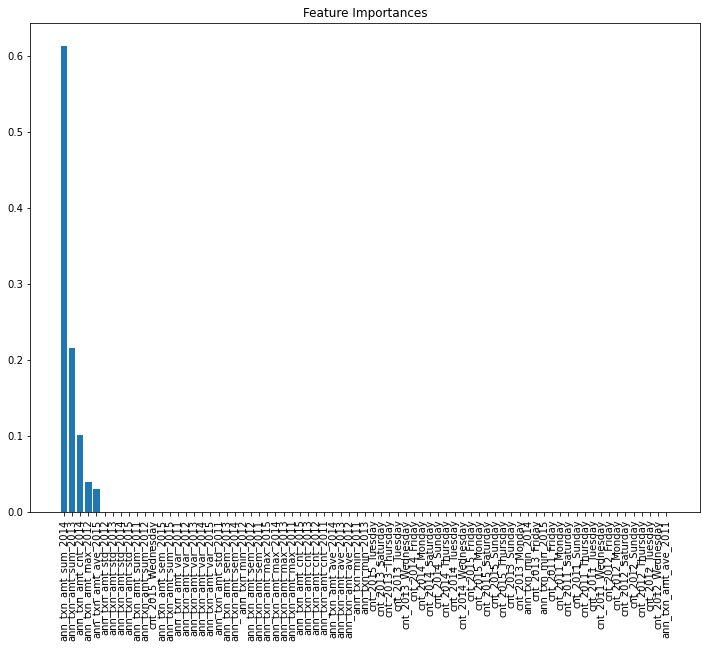

In [48]:
model_dt, importances_dt, y_test_pred_dt, y_test_prob_dt, fpr_train_dt, fpr_test_dt, tpr_train_dt, tpr_test_dt, auc_train_dt, auc_test_dt = model_dt(3, X_train_annual, X_train_annual_scaled, y_train_annual, X_test_annual_scaled, y_test_annual)

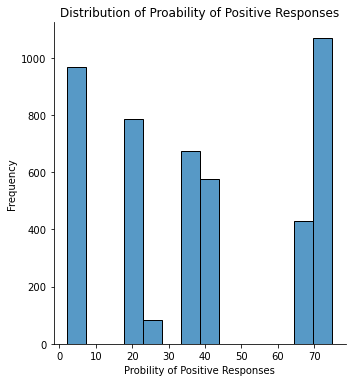

In [49]:
# plot probability distribution for test set
plot_probability(y_test_pred_dt, y_test_prob_dt)

Confusion matrix, without normalization
[[2934 1205]
 [ 154  297]]


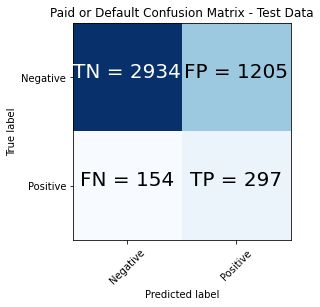

Precision score is: 0.1977363515312916
Recall score is: 0.6585365853658537


In [50]:
# plot confusion matrix and calculate precision and recall
plot_confusion_matrix(y_test_annual, y_test_pred_dt)

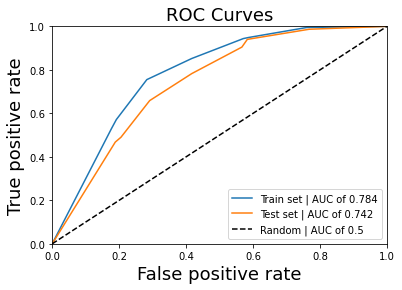

In [51]:
# plot ROC curves of train/test set
ROC_curves(fpr_train_dt, tpr_train_dt, fpr_test_dt, tpr_test_dt, auc_train_dt, auc_test_dt)

In [52]:
# plot decision boundary for top 2 features
def decision_boundary_dt_rf(best_model, coeff_importances, X_train, X_train_scaled, y_train):
    indices = np.argsort(abs(coeff_importances))[::-1]
    top_feature_1_index = indices[0]
    top_feature_2_index = indices[1]
    top_feature_1 = X_train.columns[top_feature_1_index]
    top_feature_2 = X_train.columns[top_feature_2_index]
    min_value1 = X_train_scaled.min(axis=0)[top_feature_1_index] 
    min_value2 = X_train_scaled.min(axis=0)[top_feature_2_index]
    max_value1 = X_train_scaled.max(axis=0)[top_feature_1_index]  
    max_value2 = X_train_scaled.max(axis=0)[top_feature_2_index]
    min_value1_round = np.floor(min_value1)
    min_value2_round = np.floor(min_value2)
    max_value1_round = np.ceil(max_value1)
    max_value2_round = np.ceil(max_value2)
    step1 = (max_value1_round - min_value1_round)/10
    step2 = (max_value2_round - min_value2_round)/10
    xx, yy = np.mgrid[min_value1_round:max_value1_round:step1, min_value2_round:max_value2_round:step2] # The steps 1.1111 and 1.75 were selected to create a 10x10 grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    print(grid.shape) # Confirm that grid shape is 10x10

    # np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
    # np.ones is a table full of ones
    median_inputs = np.ones((100, X_train.shape[1])) * np.median(X_train_scaled, axis=0) 
    pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

    median_inputs[:,top_feature_1_index] = grid[:,0]
    median_inputs[:,top_feature_2_index] = grid[:,1]
    probs = best_model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X_train_scaled[50:,top_feature_1_index], X_train_scaled[50:, top_feature_2_index], c=y_train[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

(100, 2)


<ipython-input-52-40ce62fdcb2f>:37: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.scatter(X_train_scaled[50:,top_feature_1_index], X_train_scaled[50:, top_feature_2_index], c=y_train[50:], s=50,


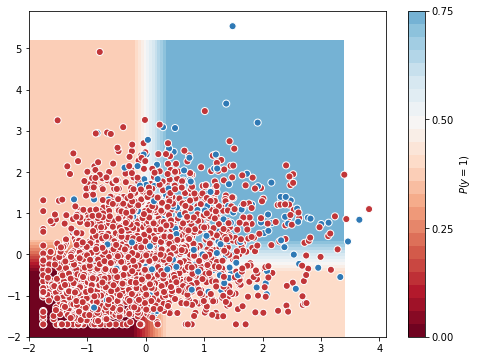

In [53]:
# Decision boundary for top 2 features
decision_boundary_dt_rf(model_dt, importances_dt, X_train_annual, X_train_annual_scaled, y_train_annual)

## Random Forest

In [54]:
def random_forest_model( X_train_scaled, y_train, X_test_scaled, y_test):
    max_depth_range = range(2, 8)
    estimator_max_depth = []
    accuracy_normalized = []
    auc_train           = []
    auc_test            = []
    f1_train            = []
    f1_test             = []
    
    for i in max_depth_range:
        # Define and fit
        estimator_max_depth.append(RandomForestClassifier(n_estimators = 200, max_depth = i, random_state=1147, class_weight = 'balanced'))
        estimator_max_depth[i-2].fit(X_train_scaled, y_train)
        # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
        scores_train = estimator_max_depth[i-2].predict_proba(X_train_scaled)[:,1] 
        scores_test  = estimator_max_depth[i-2].predict_proba(X_test_scaled)[:,1]  
        # Predict the class of test set
        y_train_predicted = estimator_max_depth[i-2].predict(X_train_scaled)
        y_test_predicted = estimator_max_depth[i-2].predict(X_test_scaled)
        # Calculate accuracy at every iteration and append
        accuracy_normalized.append(100*accuracy_score(y_test, y_test_predicted, normalize = True))
        # Calculate training and test F1 score at every iteration and append 
        f1_train.append(100*f1_score(y_train, y_train_predicted)) 
        f1_test.append(100*f1_score(y_test, y_test_predicted)) 
        # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
        fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
        # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
        fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
        # Calculate the AUCs
        auc_train.append(auc(fpr_train, tpr_train))
        auc_test.append(auc(fpr_test, tpr_test))
    table_acc = pd.DataFrame(columns=['Max_Depth','accuracy_normalized','f1_train','f1_test','auc_train','auc_test'])
    table_acc['Max_Depth'] = list(max_depth_range)
    table_acc['accuracy_normalized'] = accuracy_normalized
    table_acc['f1_train'] = f1_train
    table_acc['f1_test'] = f1_test
    table_acc['auc_train'] = auc_train
    table_acc['auc_test'] = auc_test
    
    fig_1 = plt.figure(figsize=(16,8))

    fig_1_a = plt.subplot(131)
    ax1 = table_acc.plot(x = 'Max_Depth', y = 'accuracy_normalized', ax = fig_1_a, style = 'o-', markersize =15)
    ax1.set_ylabel("Normalized Accuracy (%)")
    ax1.set_xlabel("Max_Depth")

    fig_1_b = plt.subplot(132)
    ax2 = table_acc.plot(x = 'Max_Depth', y = 'f1_train', ax = fig_1_b, style = 'o-', markersize =15)
    ax2 = table_acc.plot(x = 'Max_Depth', y = 'f1_test', ax = fig_1_b, style = 'o-', markersize =15)
    ax2.set_xlabel("Max_Depth")
    ax2.set_ylabel("F1 Score")
    # ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    fig_1_c = plt.subplot(133)
    ax2 = table_acc.plot(x = 'Max_Depth', y = 'auc_train', ax = fig_1_c, style = 'o-', markersize =15)
    ax2 = table_acc.plot(x = 'Max_Depth', y = 'auc_test', ax = fig_1_c, style = 'o-', markersize =15)
    ax2.set_xlabel("Max_Depth")
    ax2.set_ylabel("Area Under the Curve (AUC)")
    # ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.show()
    return table_acc

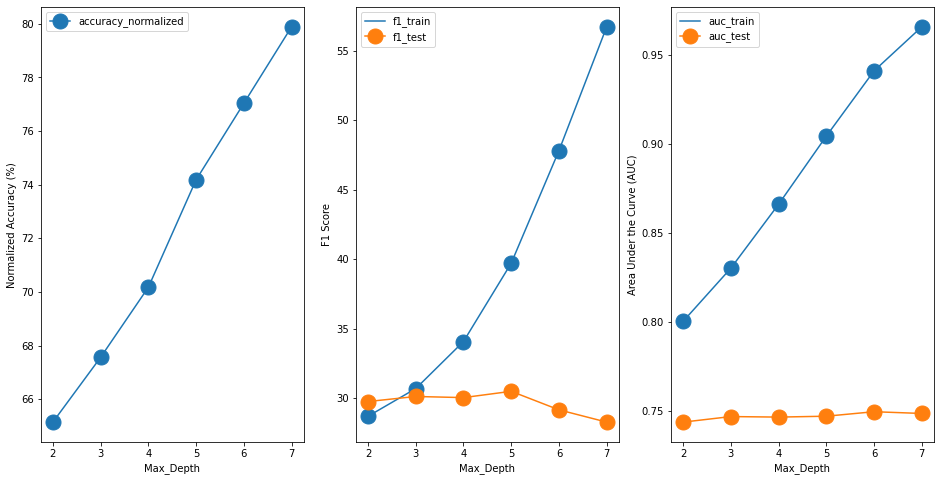

In [55]:
table_acc_rf = random_forest_model( X_train_annual_scaled, y_train_annual, X_test_annual_scaled, y_test_annual)

In [56]:
table_acc_rf

,Max_Depth,accuracy_normalized,f1_train,f1_test,auc_train,auc_test
0,2,65.141612,28.702852,29.762950,0.800220,0.743490
1,3,67.559913,30.694037,30.126701,0.830149,0.746620
2,4,70.174292,34.078807,30.045989,0.866116,0.746323
3,5,74.183007,39.711191,30.498534,0.904489,0.746823
4,6,77.037037,47.808765,29.166667,0.941239,0.749352
5,7,79.891068,56.711916,28.282828,0.966049,0.748363


By looking at the score table and 3 plots above, we found the normalized accuracy score for testing set increases as the max depth of the random forest tree increases. However, in order to acheive the best score with less model complexity we move to explore AUC and F1 scores. We could notice that the AUC score for the test set is flat for each of the 6 depths. However, the F1 score of the test set decreases after max depth of the random forest reach to 5. Thus, we choose our hyperparameter which is the max depth of the random forest to be 5.

In [57]:
# plot feature importances
def model_rf(max_depth, X_train, X_train_scaled, y_train, X_test_scaled, y_test):
    
    model_rf = RandomForestClassifier(max_depth= max_depth, random_state=1147, class_weight='balanced') 
    model_rf.fit(X_train_scaled, y_train)
    importances_rf = model_rf.feature_importances_
    # plot coefficient values for logistic regression
    plt.figure(figsize=(12,9)) 
    # sort importances in descending order
    indices = np.argsort(abs(importances_rf))[::-1]
    feature_names = [X_train.columns[i] for i in indices]
    plt.title("Feature Importances")
    plt.bar(range(X_train.shape[1]), importances_rf[indices])
    plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
    plt.show() 
    
    # plot probability 
    y_test_pred = model_rf.predict(X_test_scaled)
    y_test_prob = model_rf.predict_proba(X_test_scaled)
    scores_train = model_rf.predict_proba(X_train_scaled)[:,1] 
    scores_test  = model_rf.predict_proba(X_test_scaled)[:,1]  
    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)
    return model_rf, importances_rf, y_test_pred, y_test_prob, fpr_train, fpr_test, tpr_train, tpr_test, auc_train, auc_test  

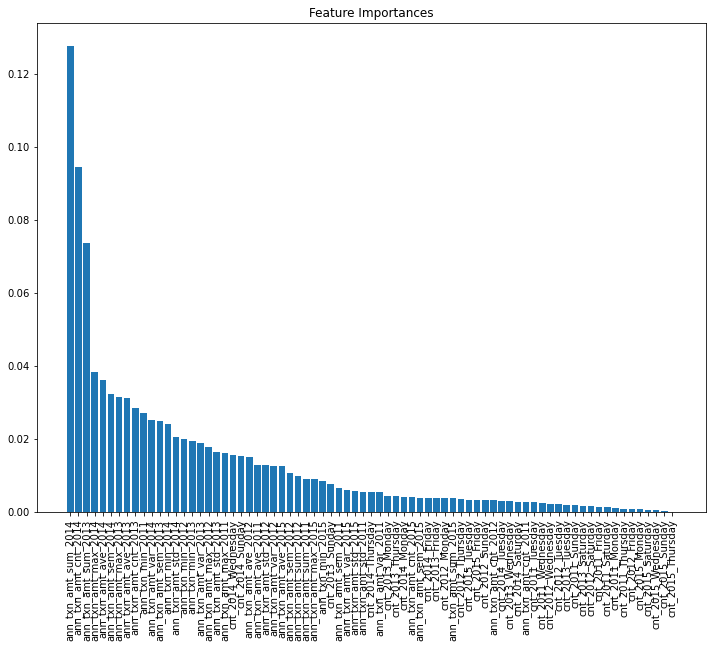

In [58]:
model_rf, importances_rf, y_test_pred_rf, y_test_prob_rf, fpr_train_rf, fpr_test_rf, tpr_train_rf, tpr_test_rf, auc_train_rf, auc_test_rf = model_rf(5, X_train_annual, X_train_annual_scaled, y_train_annual, X_test_annual_scaled, y_test_annual)

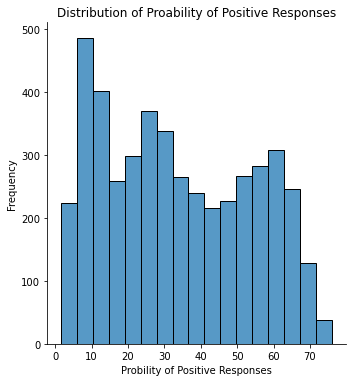

In [59]:
# plot probability distribution for test set
plot_probability(y_test_pred_rf, y_test_prob_rf)

Confusion matrix, without normalization
[[3142  997]
 [ 195  256]]


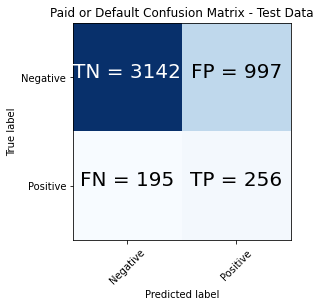

Precision score is: 0.20430965682362331
Recall score is: 0.5676274944567627


In [60]:
# plot confusion matrix and calculate precision and recall
plot_confusion_matrix(y_test_annual, y_test_pred_rf)

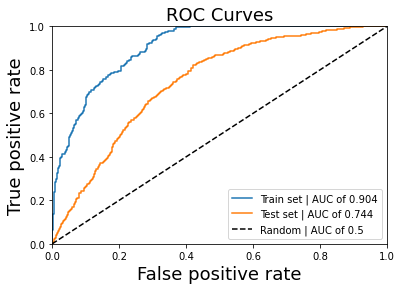

In [61]:
# plot ROC curves of train/test set
ROC_curves(fpr_train_rf, tpr_train_rf, fpr_test_rf, tpr_test_rf, auc_train_rf, auc_test_rf)

(100, 2)


<ipython-input-52-40ce62fdcb2f>:37: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.scatter(X_train_scaled[50:,top_feature_1_index], X_train_scaled[50:, top_feature_2_index], c=y_train[50:], s=50,


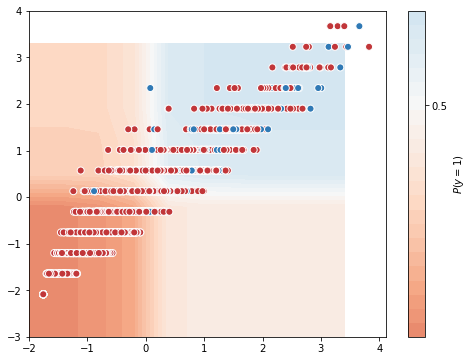

In [62]:
# decision boundary of top 2 features 
decision_boundary_dt_rf(model_rf, importances_rf, X_train_annual, X_train_annual_scaled, y_train_annual)

## Logistic Regression with L1 regularization (Monthly)

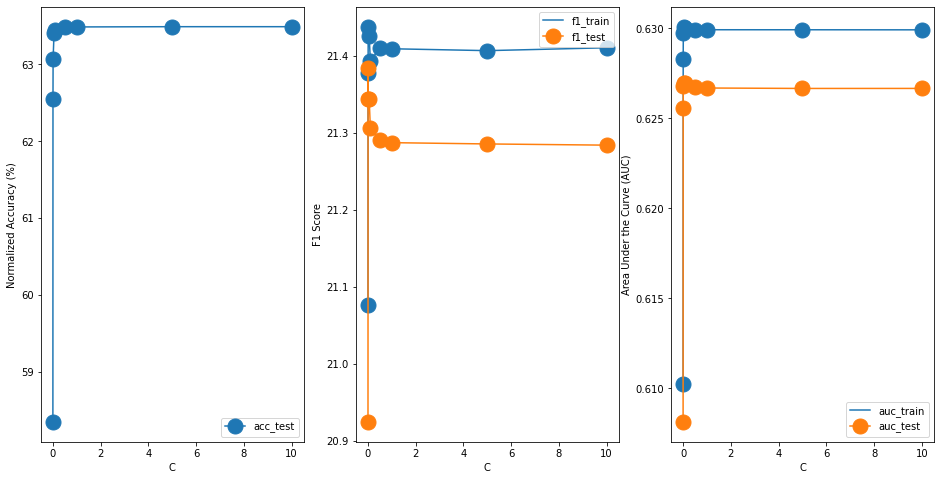

In [63]:
# Fit the training dataset and optimize the hyperparameters of the method.
table_acc_monthly_lr = logistic_regression_model(X_train_monthly_scaled, y_train_monthly, X_test_monthly_scaled, y_test_monthly)

In [64]:
table_acc_monthly_lr

,C,acc_test,f1_train,f1_test,auc_train,auc_test
0,0.001,58.351221,21.076304,20.924583,0.610265,0.608131
1,0.005,62.543174,21.376932,21.383672,0.628287,0.625579
2,0.010,63.067979,21.437474,21.343233,0.629730,0.626817
3,0.050,63.408268,21.425576,21.344149,0.630094,0.626986
4,0.100,63.441648,21.393154,21.306109,0.629996,0.626943
5,0.500,63.481982,21.409692,21.290032,0.629934,0.626723
6,1.000,63.485691,21.408834,21.287015,0.629924,0.626687
7,5.000,63.488936,21.406397,21.285357,0.629923,0.626663
8,10.000,63.488936,21.410120,21.283784,0.629919,0.626664


By looking at the table and above 3 plots, we notice that the accuracy score stay nearly unchanged after the hyperparameter C reaches to 0.05. F1 score for testing set start to decrease after the hyperparameter reaches to 0.05. AUC score for testing set decreases after C reaches to 0.05. Thus, we choose our hyperparameter C to be 0.05

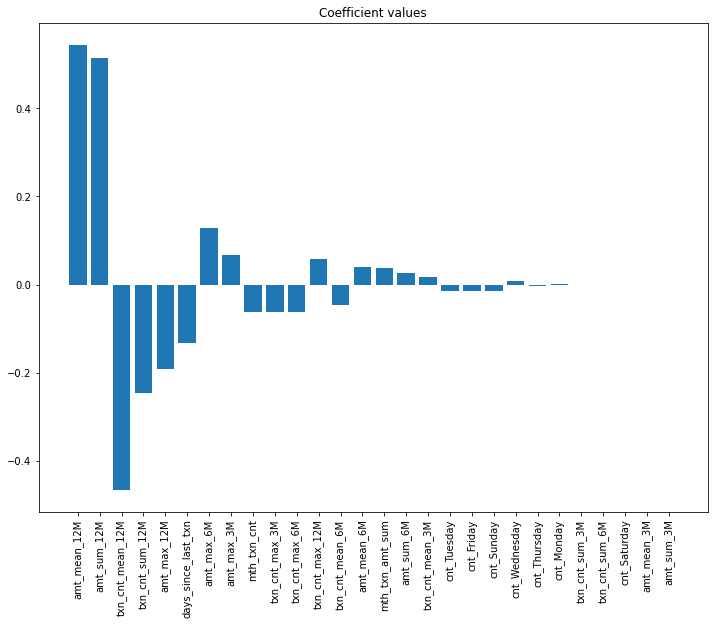

In [65]:
# plot feature importances
model_lr_monthly, importances_lr_monthly, y_test_pred_monthly_lr, y_test_prob_monthly_lr, fpr_train_monthly_lr, fpr_test_monthly_lr, tpr_train_monthly_lr, tpr_test_monthly_lr, auc_train_monthly_lr, auc_test_monthly_lr = best_model_lr(0.050, X_train_monthly, X_train_monthly_scaled, y_train_monthly, X_test_monthly_scaled, y_test_monthly)

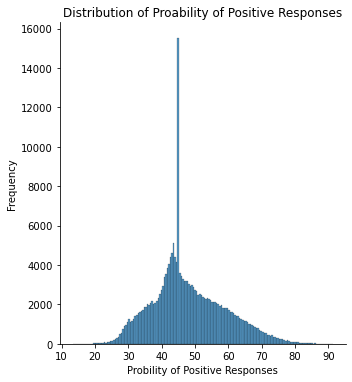

In [66]:
# plot probability distribution for test set.
plot_probability(y_test_pred_monthly_lr, y_test_prob_monthly_lr)

Confusion matrix, without normalization
[[126062  69335]
 [  9593  10709]]


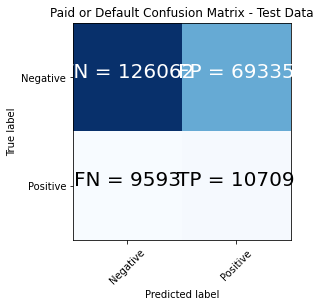

Precision score is: 0.13378891609614713
Recall score is: 0.5274849768495715


In [67]:
# plot confusion matrix and calculate precision and recall
plot_confusion_matrix(y_test_monthly, y_test_pred_monthly_lr)

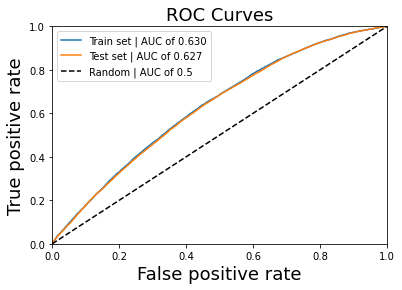

In [68]:
# plot ROC curves of train/test set
ROC_curves(fpr_train_monthly_lr, tpr_train_monthly_lr, fpr_test_monthly_lr, tpr_test_monthly_lr, auc_train_monthly_lr, auc_test_monthly_lr)

(100, 2)


<ipython-input-42-f3520da95f53>:37: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.scatter(X_train_scaled[50:,top_feature_1_index], X_train_scaled[50:, top_feature_2_index], c=y_train[50:], s=50,


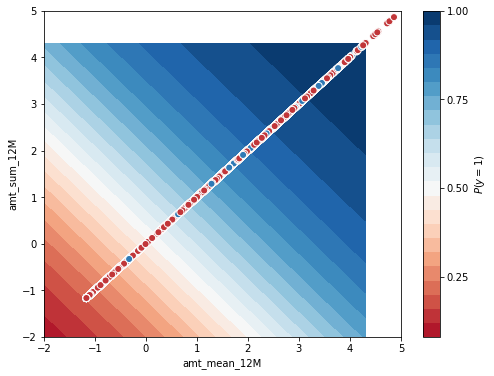

In [69]:
# plot decision boundary of top 2 features
decision_boundary(model_lr_monthly, importances_lr_monthly, X_train_monthly, X_train_monthly_scaled, y_train_monthly)

## Decision Tree (Monthly)

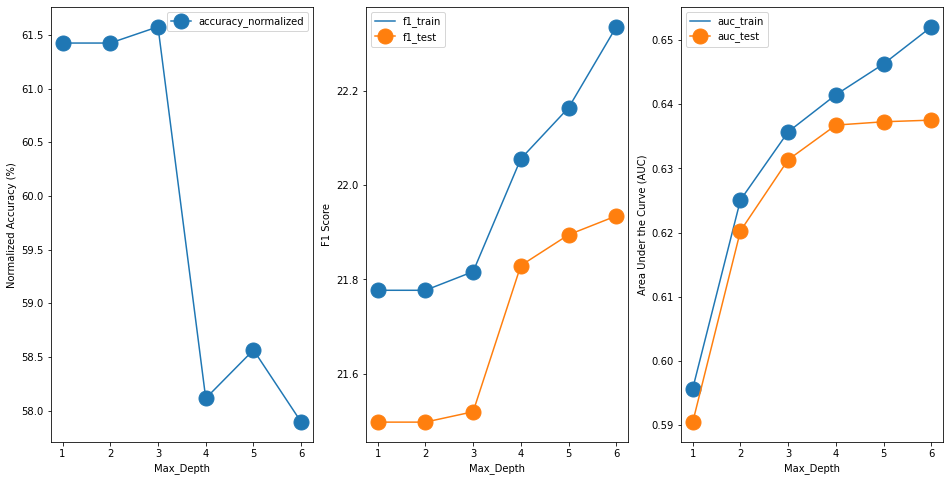

In [70]:
# Fit the training dataset and optimize the hyperparameters of the method.
table_acc_dt_monthly = best_model_dt(X_train_monthly_scaled, y_train_monthly, X_test_monthly_scaled, y_test_monthly)

In [71]:
table_acc_dt_monthly

,Max_Depth,accuracy_normalized,f1_train,f1_test,auc_train,auc_test
0,1,61.424485,21.777108,21.497646,0.595693,0.590467
1,2,61.424485,21.777108,21.497646,0.625082,0.620261
2,3,61.576085,21.816601,21.519611,0.635699,0.631349
3,4,58.114317,22.055926,21.829603,0.641477,0.636744
4,5,58.564945,22.164040,21.894799,0.646289,0.637262
5,6,57.892712,22.335636,21.934763,0.652061,0.637517


By looking at the table and 3 plots above, the normalized accuracy score decreases after max depth equal to 3. For F1 score in the testing set, the f1 score increases after max depth reaches to 3. And the AUC score stays nearly unchanged after 3. We choose max depth equal to 3 as our tuned hyperparameter to reduce model complexity associated with high a combination of high accuracy scores.

In [72]:
# Plot coeffcient values or feature importance.
def model_dt_monthly(max_depth, X_train, X_train_scaled, y_train, X_test_scaled, y_test):
    
    model = DecisionTreeClassifier(max_depth= max_depth, random_state=1147, class_weight='balanced') 
    model.fit(X_train_scaled, y_train)
    importances_dt = model.feature_importances_
    # plot coefficient values for logistic regression
    plt.figure(figsize=(12,9)) 
    # sort importances in descending order
    indices = np.argsort(abs(importances_dt))[::-1]
    feature_names = [X_train.columns[i] for i in indices]
    plt.title("Feature Importances")
    plt.bar(range(X_train.shape[1]), importances_dt[indices])
    plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
    plt.show() 
    
    # plot probability 
    y_test_pred = model.predict(X_test_scaled)
    y_test_prob = model.predict_proba(X_test_scaled)
    scores_train = model.predict_proba(X_train_scaled)[:,1] 
    scores_test  = model.predict_proba(X_test_scaled)[:,1]  
    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)
    return model, importances_dt, y_test_pred, y_test_prob, fpr_train, fpr_test, tpr_train, tpr_test, auc_train, auc_test  

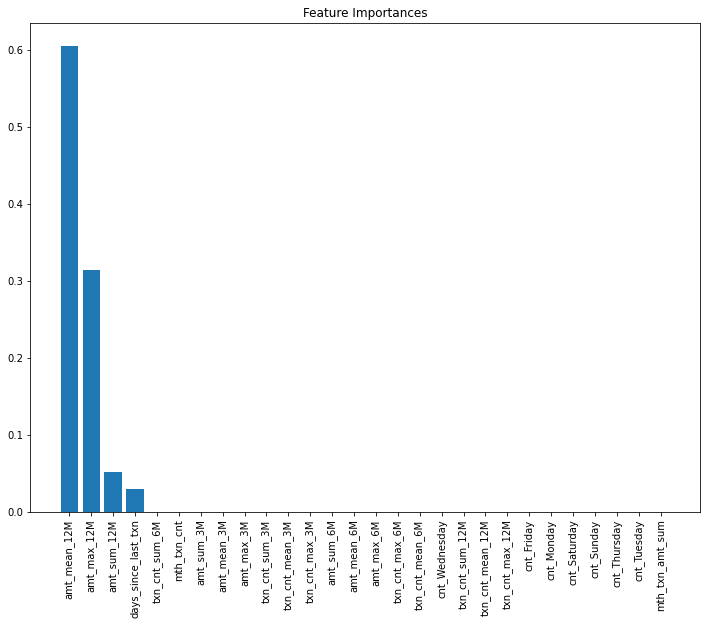

In [73]:
model_dt_monthly, importances_dt_monthly, y_test_pred_monthly, y_test_prob_monthly, fpr_train_monthly, fpr_test_monthly, tpr_train_monthly, tpr_test_monthly, auc_train_monthly, auc_test_monthly  = model_dt_monthly(3, X_train_monthly, X_train_monthly_scaled, y_train_monthly, X_test_monthly_scaled, y_test_monthly)

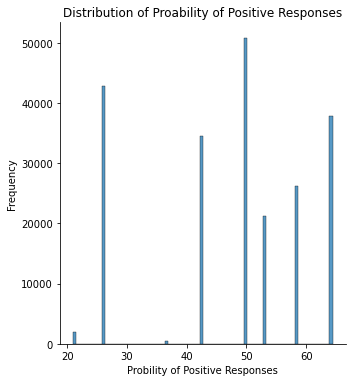

In [74]:
# plot probability distribution for test set
plot_probability(y_test_pred_monthly, y_test_prob_monthly)

Confusion matrix, without normalization
[[121456  73941]
 [  8939  11363]]


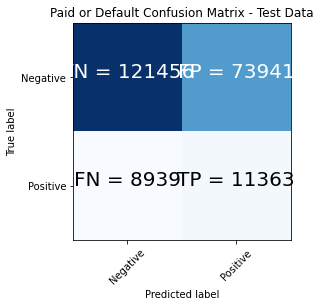

Precision score is: 0.13320594579386663
Recall score is: 0.5596985518668112


In [75]:
# Plot confusion matrix and calculate precision and recall
plot_confusion_matrix(y_test_monthly, y_test_pred_monthly)

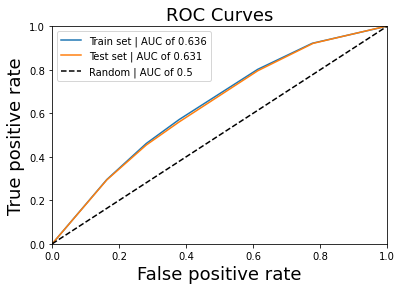

In [76]:
# plot ROC curves
ROC_curves(fpr_train_monthly, tpr_train_monthly, fpr_test_monthly, tpr_test_monthly, auc_train_monthly, auc_test_monthly)

(100, 2)


<ipython-input-52-40ce62fdcb2f>:37: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.scatter(X_train_scaled[50:,top_feature_1_index], X_train_scaled[50:, top_feature_2_index], c=y_train[50:], s=50,


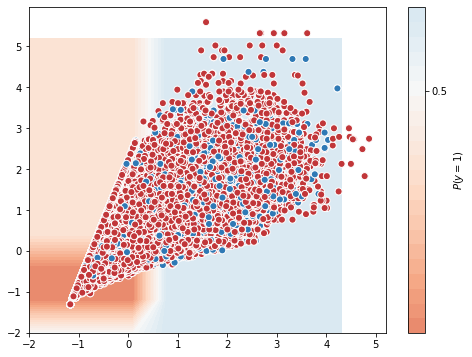

In [77]:
# plot decision boundary for top 2 features
decision_boundary_dt_rf(model_dt_monthly, importances_dt_monthly, X_train_monthly, X_train_monthly_scaled, y_train_monthly)

## Random Forest (Monthly)

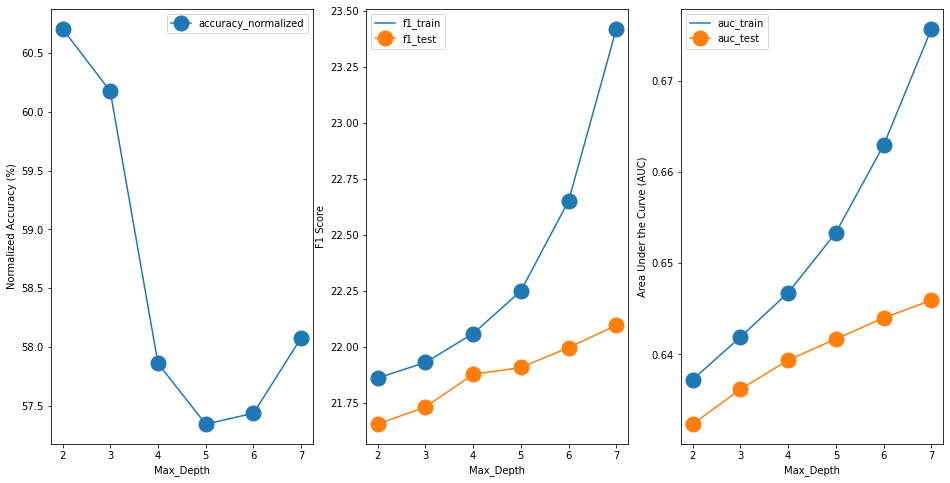

In [78]:
# Fit the training dataset and optimize the hyperparameters of the method.
table_acc_rf_monthly = random_forest_model(X_train_monthly_scaled, y_train_monthly, X_test_monthly_scaled, y_test_monthly)

In [79]:
table_acc_rf_monthly

,Max_Depth,accuracy_normalized,f1_train,f1_test,auc_train,auc_test
0,2,60.705891,21.860001,21.654049,0.637244,0.632353
1,3,60.175059,21.929681,21.730811,0.641914,0.636191
2,4,57.861186,22.058520,21.876316,0.646780,0.639382
3,5,57.345653,22.249418,21.907227,0.653376,0.641704
4,6,57.437911,22.651652,21.996024,0.662987,0.644009
5,7,58.080473,23.421062,22.096049,0.675737,0.645962


By looking at the table and 3 plots above, we notice that F1 and AUC scores for test set acheives highest score at max depth of random forest tree equals to 7. To prevent underfitting, although the accuracy score for test set decreases till 5 and increases after, we choose max depth equals to 7 as our tuned hyperparameter.

In [80]:
# Plot coefficient values or feature importance.
def model_rf_monthly(max_depth, X_train, X_train_scaled, y_train, X_test_scaled, y_test):
    
    model_rf = RandomForestClassifier(max_depth= max_depth, random_state=1147, class_weight='balanced') 
    model_rf.fit(X_train_scaled, y_train)
    importances_rf = model_rf.feature_importances_
    # plot coefficient values for logistic regression
    plt.figure(figsize=(12,9)) 
    # sort importances in descending order
    indices = np.argsort(abs(importances_rf))[::-1]
    feature_names = [X_train.columns[i] for i in indices]
    plt.title("Feature Importances")
    plt.bar(range(X_train.shape[1]), importances_rf[indices])
    plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
    plt.show() 
    
    # plot probability 
    y_test_pred = model_rf.predict(X_test_scaled)
    y_test_prob = model_rf.predict_proba(X_test_scaled)
    scores_train = model_rf.predict_proba(X_train_scaled)[:,1] 
    scores_test  = model_rf.predict_proba(X_test_scaled)[:,1]  
    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)
    return model_rf, importances_rf, y_test_pred, y_test_prob, fpr_train, fpr_test, tpr_train, tpr_test, auc_train, auc_test  

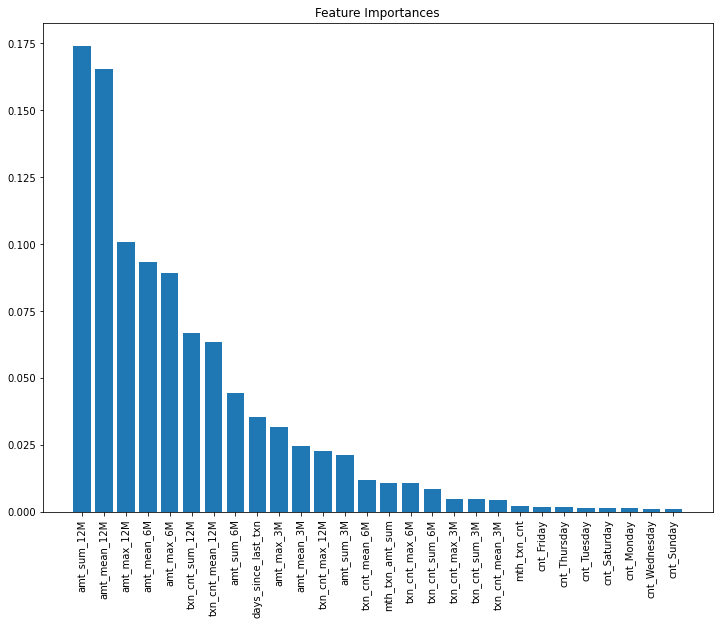

In [81]:
model_rf_monthly, importances_rf_monthly, y_test_pred_rf_monthly, y_test_prob_rf_monthly, fpr_train_rf_monthly, fpr_test_rf_monthly, tpr_train_rf_monthly, tpr_test_rf_monthly, auc_train_rf_monthly, auc_test_rf_monthly = model_rf_monthly(7, X_train_monthly, X_train_monthly_scaled, y_train_monthly, X_test_monthly_scaled, y_test_monthly)

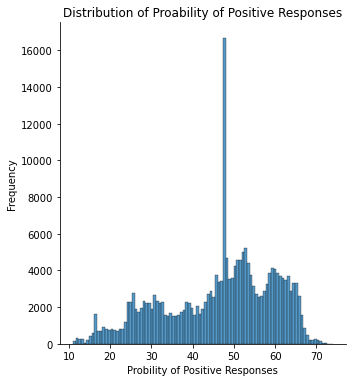

In [82]:
# plot probability distribution for test set
plot_probability(y_test_pred_rf_monthly, y_test_prob_rf_monthly)

Confusion matrix, without normalization
[[113086  82311]
 [  7552  12750]]


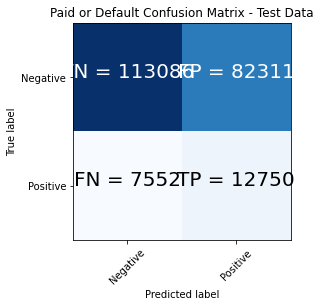

Precision score is: 0.13412440432985137
Recall score is: 0.6280169441434341


In [83]:
# plot confusion matrix and calculate precision and recall
plot_confusion_matrix(y_test_monthly, y_test_pred_rf_monthly)

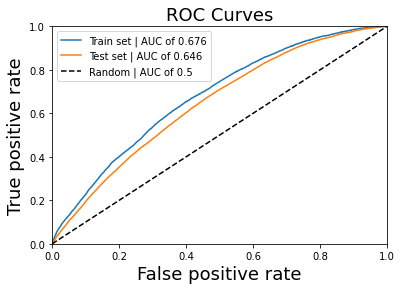

In [84]:
# plot ROC curves of train/test set.
ROC_curves(fpr_train_rf_monthly, tpr_train_rf_monthly, fpr_test_rf_monthly, tpr_test_rf_monthly, auc_train_rf_monthly, auc_test_rf_monthly)

(100, 2)


<ipython-input-52-40ce62fdcb2f>:37: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.scatter(X_train_scaled[50:,top_feature_1_index], X_train_scaled[50:, top_feature_2_index], c=y_train[50:], s=50,


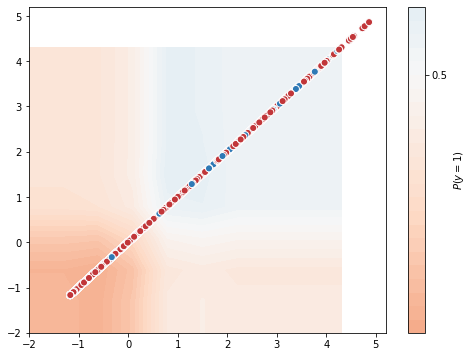

In [85]:
# Plot decision boundary for top 2 features.
decision_boundary_dt_rf(model_rf_monthly, importances_rf_monthly, X_train_monthly, X_train_monthly_scaled, y_train_monthly)

## 1.3 Comparison of methods (10 points)

Compare the two feature engineering (annual and monthly) and the three modeling ap-
proaches (L1 log-reg, tree, forests) in terms of the outcomes of steps 5-8. Which combina-
tion of feature engineering and modeling approach do you select as the best to deploy in a
production environment and why?

| Feature | Model | probability distribution for test set| Number of importance features | Precision | Recall | Accuracy | Training AUC | Testing AUC | Training F1 Score | Testing F1 Score | top 2 features |
| ------- | ----- | ---------- | ------ | -------- | ------------ | ----------- | ----------------- | ------------------ | ------ | ------ | ------ |
| Annual  | Logistic Regression with L1 regularizaztion | dense and right skewed with maximum at 10% for positive responses rate | 58 | 0.199 | 0.623 | 0.703 | 0.808 | 0.765 | 0.310 | 0.312 | 'ann_txn_amt_sum_2013','ann_txn_amt_std_2012' |
|         | Decision Tree | spread and with maximum probability of 70% for positive response rate | 5 | 0.198 | 0.659 | 0.704 | 0.784 | 0.742 | 0.316 | 0.304 | 'ann_txn_amt_sum_2013','ann_txn_amt_sum_2014' |
|         | Random Forest | dense and almost uniformly distributed with maximum at 10% for positive responses rate | 75 | 0.204 | 0.568 | 0.742 | 0.904 | 0.747 | 0.397 | 0.305 | 'ann_txn_amt_sum_2014','ann_txn_amt_cnt_2014' |
| Monthly  | Logistic Regression with L1 regularizaztion | dense with one maximum value at 45% for positive responses rate | 20 | 0.134 | 0.527 | 0.634 | 0.630 | 0.627 | 0.214 | 0.213 | 'amt_mean_12M','amt_sum_12M' |
|         | Decision Tree | spread and with maximum probability of 50% for positive responses rate | 4 | 0.133 | 0.560 | 0.616 | 0.636 | 0.631 | 0.218 | 0.215 | 'amt_mean_12M','amt_max_12M' |
|         | Random Forest | centered with one maximum probability of 48% for positive responses rate |28 |0.134 | 0.628 | 0.581 | 0.676 | 0.646 | 0.234 | 0.221 | 'amt_sum_12M''amt_mean_12M' |

Comparing the two feature engineering(annual and monthly):
- The overall Accuracy, F1 and AUC scores for each of the 3 models in annual features are better than monthly features which makes sense since we have more features (more information) in the annual dataset for 3 models.
- By looking at the probability distribution, we could conclude annual dataset could predict higher positive response rate compare to the monthly dataset.
- For the confusion matrix, we observed that the precision and recall scores are higher than monthly data in general which means annual feature could predict more precise than the monthly feature.
- By looking at the top 2 features, we could notice that the long term features are preferred in both Annual and Monthly dataset.

Comparing 3 models:

- Logistic regression has better AUC and F1 scores in test set than other 2 models for annual features. And Random forest has better accuracy score for annual features which makes sense since accuracy is not sensitive and accurate to imbalanced data. However, the result is opposite for monthly features with lower accuracy score in random forest and higher AUC and F1 scores for logisitic regression.
- Decision Tree could give us higher Recall score for annual features and Random Forest could give us higher Recall score for monthly features.
- By looking at the probability distribution for the test set, logistic regression could predict higher positive responses rate compare to other models in both features.
- Taking model complexity and best scores in to consideration, logistic regression is better for both features.

Combination of feature engineering and modelling approach:

- We are more interested in predicting the accuracy of true positive rate among all actual positive cases to record people positive reactions to the promotion campaign. In this case, it will help to increase the revenue of the company. Thus, we will prefer higher recall scores that calculated in confusion matrix. 
- By comparing 3 models, we analyze that logistic regression is better for both features by the model complexity deduction and higher overall scores.
- We choose the best recall score with logistic regression in these 2 features. Also, by analyzing feature engineering, we conclude long term features could predict better than short term features.  Thus, we end up choosing annual features with logistic regression model for our prediction purposes.